In [1]:
#Define the environment
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date, VARCHAR
from sqlalchemy.ext.declarative import declarative_base
import matplotlib.pyplot as plt

Base2 = declarative_base()
import os
os.getcwd()
import pandas as pd
from config import key


In [2]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:{}@localhost:5432/EmployeeSQL'.format(key))
connection = engine.connect()
inspector = inspect(engine)
inspector.get_table_names()

['employees', 'dept_emp', 'department', 'dept_manager', 'salaries', 'titles']

In [4]:
## Collect the names of tables within the database
columns = inspector.get_columns('salaries')
for column in columns:
    print(column["name"], column["type"])

emp_no INTEGER
salary INTEGER
from_date DATE
to_date DATE


In [5]:
#Define the class and the columns 
class Salaries(Base2):
    __tablename__ = 'salary'
    emp_no = Column (Integer,primary_key=True)
    salary = Column (Integer)
    from_date= Column(Date)
    to_date =Column(Date)


In [6]:
#Read the sql file in pandas
salary=pd.read_sql('select * from Salaries', engine )
#select just the column salary
salary2=pd.read_sql('select salary from Salaries', engine )
#print the column
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


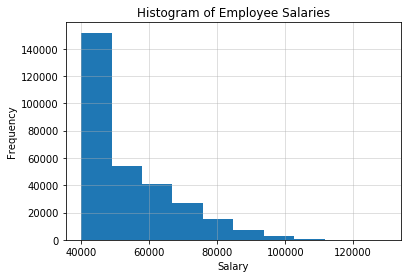

In [7]:
#Create a histogram to visualize the most common salary ranges for employees.
salary2.hist()

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Salaries')
plt.grid (True,alpha=0.5)

#saving the image
plt.savefig("Histogram")


In [8]:
## Collect the names of tables within the database
columns = inspector.get_columns('titles')
for column in columns:
    print(column["name"], column["type"])


emp_no INTEGER
title VARCHAR
from_date DATE
to_date DATE


In [9]:
#Define the class and the columns 
class Titles(Base2):
    __tablename__ = 'titles'
    emp_no = Column (Integer,primary_key=True)
    title = Column (VARCHAR)
    from_date= Column(Date)
    to_date =Column(Date)

In [10]:
#Read the sql file in pandas
Title=pd.read_sql('select * from Titles', engine)
#print the column
Title.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [11]:
#Merge the data
Mergeinfo=salary.merge(Title, on='emp_no', how='inner')
Mergeinfo.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [28]:
#Filter the title and salary from the table
avg_salary=pd.DataFrame(Mergeinfo.groupby(["title"])["salary"].mean())
avg_salary

avg_salary.style.format({
    "salary": '${:.2f}'
})

,salary
title,
Assistant Engineer,$48493.20
Engineer,$48539.78
Manager,$51531.04
Senior Engineer,$48506.75
Senior Staff,$58503.29
Staff,$58465.27
Technique Leader,$48580.51


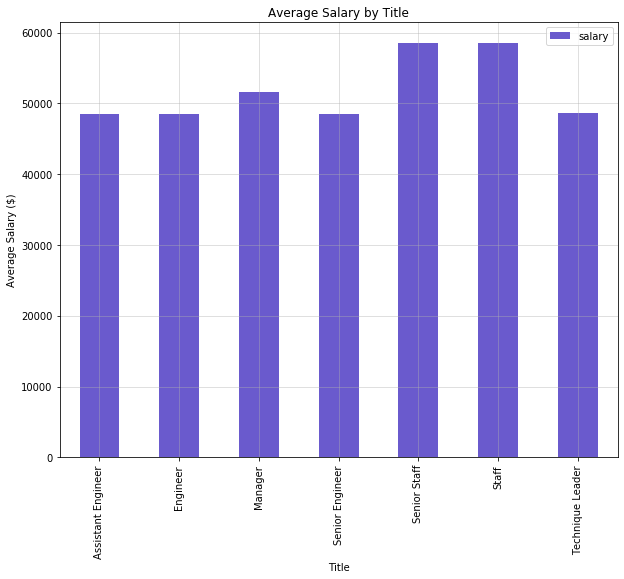

In [29]:
#Create a bar chart of average salary by title.
avg_salary.plot.bar(color = "slateblue",figsize=(10,8))

#define the bar's title
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Title')
plt.grid (True,alpha=0.5)

#save the image
plt.savefig("AVG Salary")